In [1]:
import numpy as np

W = np.array([[0,1,1,1,1,0,0,0,0,0,0],[1,0,1,1,1,0,0,0,0,0,0],[1,1,0,1,1,0,0,0,0,0,0],
[1,1,1,0,1,1,0,0,0,0,0],[1,1,1,1,0,1,0,0,0,0,0],[0,0,0,1,1,0,1,1,0,0,0],
[0,0,0,0,0,1,0,1,1,1,1],[0,0,0,0,0,1,1,0,1,1,1],[0,0,0,0,0,0,1,1,0,1,1],
[0,0,0,0,0,0,1,1,1,0,1],[0,0,0,0,0,0,1,1,1,1,0]])

# Valori di beta
beta_values = [0.1, 0.2]

# Identità di dimensione uguale a W
I = np.eye(W.shape[0])

# Risultati
results = {}

for beta in beta_values:
    # Calcolo della matrice M
    M = np.linalg.inv(I - beta * W)
    
    # Calcolo di z_i e M_ii
    z = M.sum(axis=0)  # Somma delle colonne
    M_diag = np.diag(M)  # Elementi diagonali
    
    # Calcolo del rapporto z_i^2 / M_ii
    ratios = z**2 / M_diag
    
    # Nodo chiave
    tol=0.0001
    rmax=ratios.max()
    key_player = np.where(np.isclose(ratios, rmax, atol=tol))[0] + 1
    

    # Salvataggio dei risultati
    results[beta] = {
        "M": M,
        "z": z,
        "rmax": rmax,
        "M_diag": M_diag,
        "ratios": ratios,
        "key_player": key_player   
    }

# Stampa risultati
for beta, result in results.items():
    print(f"\nBeta = {beta}")
    #print("z (Somma colonne):", result["z"])
    #print("M_diag (Diagonale):", result["M_diag"])
    #print("Ratios (z_i^2 / M_ii):", result["ratios"])
    print("Key Player :", result["key_player"])
    #print("rmax :", result["rmax"])


Beta = 0.1
Key Player : [4 5 7 8]

Beta = 0.2
Key Player : [6]


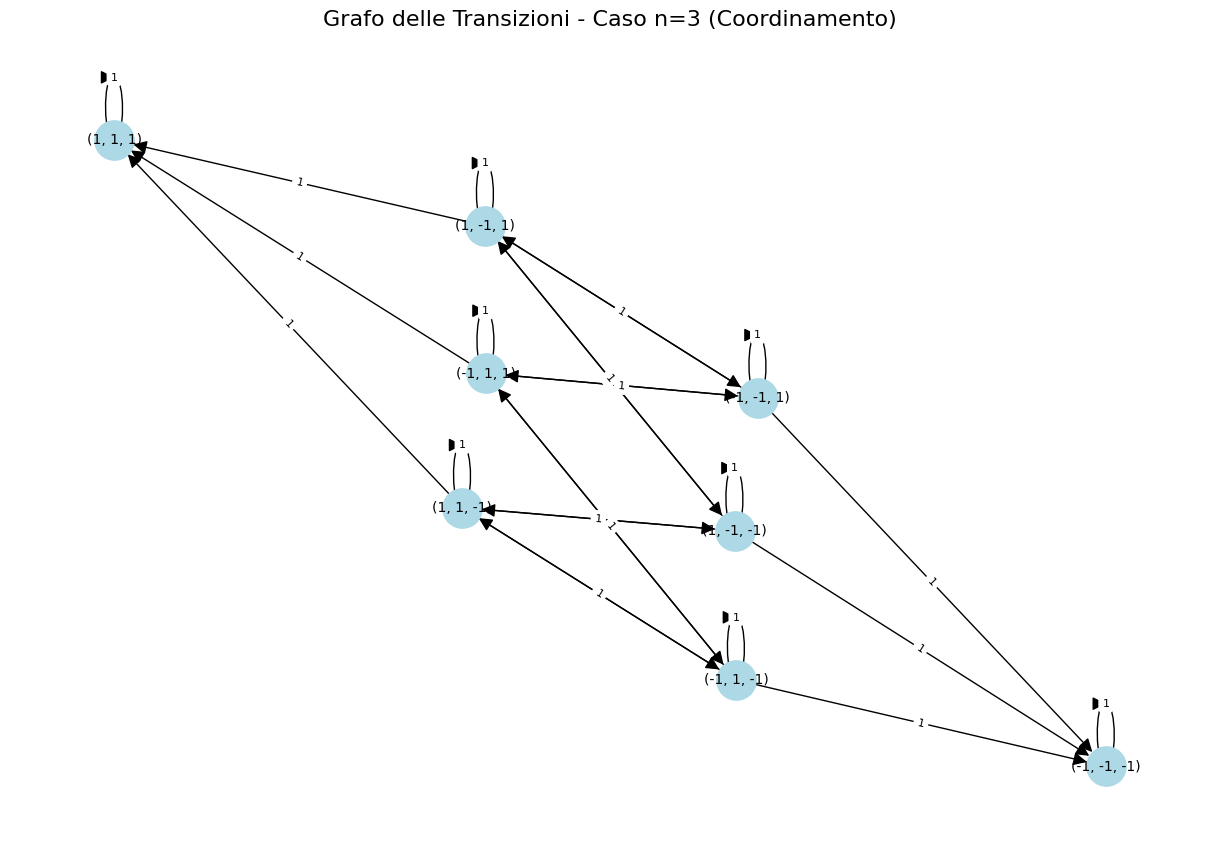

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product

# Configurazioni possibili: tutte le combinazioni di {-1, +1}^3
configurations = list(product([-1, 1], repeat=3))

# Funzione per determinare la best response di un giocatore
def best_response(player, x):
    n = len(x)
    # Coordinamento: seguire la maggioranza
    majority = sum(x[j] for j in range(n) if j != player)
    return 1 if majority > 0 else -1

# Creazione del grafo per n=3
G = nx.DiGraph()

# Aggiunta dei nodi e degli archi
for x in configurations:
    x = list(x)  # Convertire in lista per modifiche
    G.add_node(tuple(x))  # Nodo corrispondente alla configurazione
    # Per ogni giocatore, calcolare la nuova configurazione se si aggiorna
    for player in range(len(x)):
        new_x = x.copy()
        new_x[player] = best_response(player, x)
        G.add_edge(tuple(x), tuple(new_x))  # Aggiungere arco di transizione

# Aggiunta dell'arco 
G.add_edge((-1, 1, -1), (-1, 1, 1))
G.add_edge((-1, 1, -1), (1, 1, -1))
G.add_edge((-1, -1, 1), (-1, 1, 1))
G.add_edge((-1, -1, 1), (1, -1, 1))
G.add_edge((1, -1, -1), (1, 1, -1))
G.add_edge((1, -1, -1), (1, -1, 1))
G.add_edge((1, -1, 1), (1, -1, 1))
G.add_edge((-1, 1, 1), (-1, 1, 1))
G.add_edge((1, 1, -1), (1, 1, -1))

# Disegno del grafo
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=30)  # Layout del grafo
nx.draw(
    G, pos, with_labels=True, node_size=800, font_size=10, 
    font_color="black", arrowsize=20, node_color="lightblue"
)
edge_labels = {edge: "1" if edge != ((-1, 1, -1), (-1, 1, 1)) else "" for edge in G.edges()}  # Rate di transizione uguali a 1
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("Grafo delle Transizioni - Caso n=3 (Coordinamento)", fontsize=16)
plt.show()


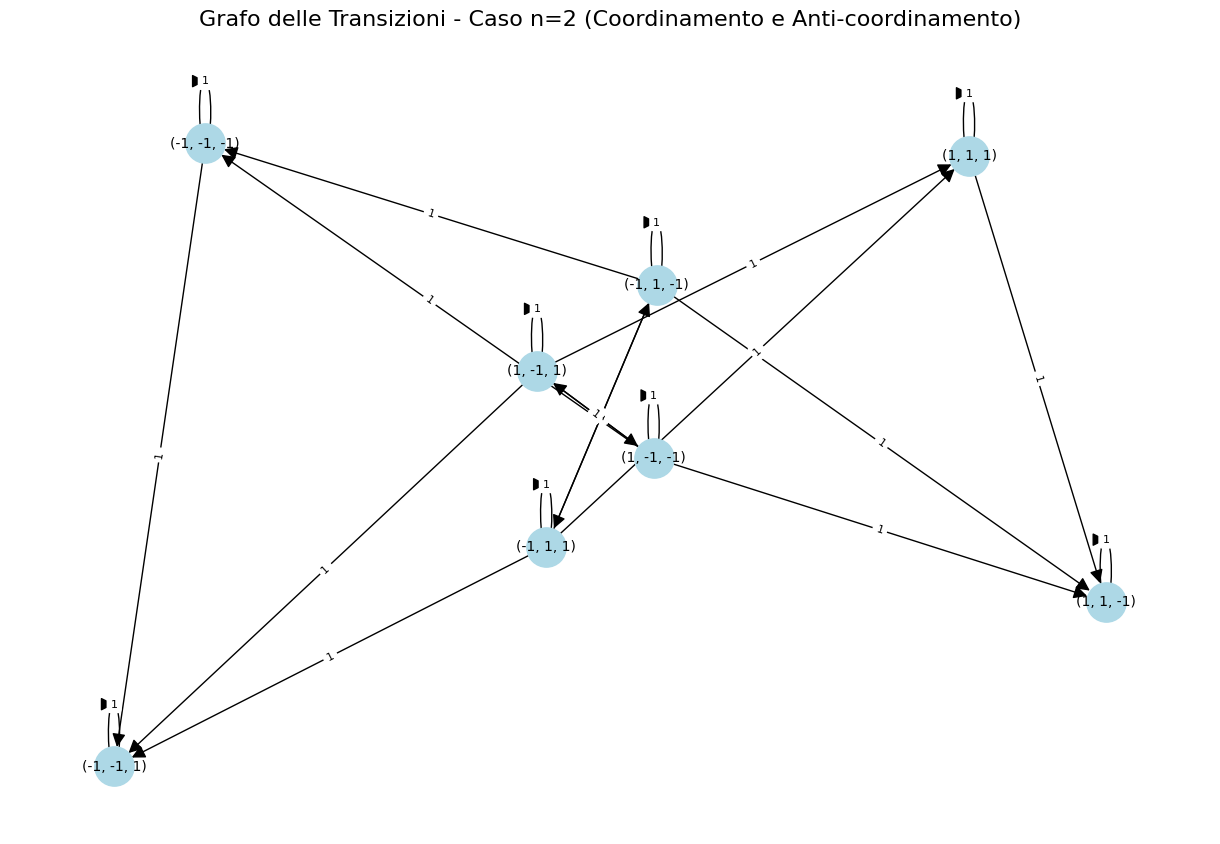

In [46]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product

# Configurazioni possibili: tutte le combinazioni di {-1, +1}^3
configurations = list(product([-1, 1], repeat=3))

# Funzione per determinare la best response di un giocatore
def best_response(player, x, V1, V2):
    n = len(x)
    if player in V1:
        # Coordinamento: seguire la maggioranza
        majority = sum(x[j] for j in range(n) if j != player)
        return 1 if majority > 0 else -1
    elif player in V2:
        # Anti-coordinamento: opporsi alla maggioranza
        majority = sum(x[j] for j in range(n) if j != player)
        return -1 if majority > 0 else 1
    return x[player]  # Default (non dovrebbe mai accadere)

# Parametri per il caso n=2
V1 = [0, 1]  # Due giocatori in V1 (coordinamento)
V2 = [2]     # Un giocatore in V2 (anti-coordinamento)

# Creazione del grafo per n=2
G = nx.DiGraph()

# Aggiunta dei nodi e degli archi
for x in configurations:
    x = list(x)  # Convertire in lista per modifiche
    G.add_node(tuple(x))  # Nodo corrispondente alla configurazione
    # Per ogni giocatore, calcolare la nuova configurazione se si aggiorna
    for player in range(len(x)):
        new_x = x.copy()
        new_x[player] = best_response(player, x, V1, V2)
        G.add_edge(tuple(x), tuple(new_x))  # Aggiungere arco di transizione

# Aggiunta dell'arco
G.add_edge((-1, 1, -1), (1, 1, -1))
G.add_edge((1, -1, 1), (1, -1, -1))
G.add_edge((1, -1, -1), (1, 1, -1))
G.add_edge((-1, 1, 1), (-1, 1, -1))
G.remove_edge((1, 1, -1), (1, -1, -1))
G.remove_edge((1, 1, -1), (-1, 1, -1))

# Disegno del grafo
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=30)  # Layout del grafo
nx.draw(
    G, pos, with_labels=True, node_size=800, font_size=10, 
    font_color="black", arrowsize=20, node_color="lightblue"
)
edge_labels = {edge: "1" for edge in G.edges()}  # Rate di transizione uguali a 1
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("Grafo delle Transizioni - Caso n=2 (Coordinamento e Anti-coordinamento)", fontsize=16)
plt.show()
